<a href="https://colab.research.google.com/github/fabiobif/VoltageLoss/blob/main/Analysis_LossTransmission.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory data analysis for electrical grid loss prediction

Candidate: Fábio Bif Goularte (fabio.goularte@gmail.com)


In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Thu Apr  8 11:59:36 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 460.67       Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla P100-PCIE...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   33C    P0    28W / 250W |      0MiB / 16280MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

###Importing Libraries

In [ ]:
import numpy as np        # 
import pandas as pd       # preprocessing
import matplotlib.pyplot as plt

import seaborn as sns
%matplotlib inline


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Loading dataset

The available dataset in the problem definition presents a large volume of data, which makes the exploratory analysis of the data a very challenging task. Besides the volume of data, there is also the fact that the data are unstructured that makes it difficult to perform analysis.

> *As a solution to the difficulties described, one can extract a range of data in order to ensure a statistically representative sample of the data set.*





In [ ]:
#dataset = pd.read_csv('/content/drive/MyDrive/Colab_datasets/database.csv') # (million of column).


## Data Selection and Sampling

###Data description
The database contains 501 signal measurements, each signal contains 800,000 measurements of the voltage of a power line (the measurements are stored in columns). The network operates in a three-phase (0,1,2) power scheme and all three phases are measured simultaneously. The last 3 columns of the database represent respectively the signal ID, phase, and the target representing absence (0) or presence of partial discharge (1). The available dataset and sampling.

###Sampling
Considering the calculation for simple random sampling in a population of 800,000 (measurements) at the 95% confidence level (𝛂 = 0.05), the required sample size would be 246. However, one can work on a larger sample size, and thereby decrease the margin of error.

> *The sample used presents 3334 individuals, selected sequentially and at intervals (of 3 individuals). Since the frequency of the measurements is not known (e.g.: daily, weekly, monthly), we chose to perform the sampling sequentially and not randomly.*

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab_datasets/LostTransmission/database.csv', usecols = [i for i in range(0, 10000, 3)])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501 entries, 0 to 500
Columns: 3334 entries, 0 to 9999
dtypes: int64(3334)
memory usage: 12.7 MB


In [ ]:
df.describe()

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,...,9882,9885,9888,9891,9894,9897,9900,9903,9906,9909,9912,9915,9918,9921,9924,9927,9930,9933,9936,9939,9942,9945,9948,9951,9954,9957,9960,9963,9966,9969,9972,9975,9978,9981,9984,9987,9990,9993,9996,9999
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,-0.598802,-0.730539,-0.682635,-0.616766,-0.556886,-0.784431,-0.704591,-0.570858,-0.616766,-0.712575,-0.726547,-0.708583,-0.856287,-0.720559,-0.640719,-0.536926,-0.626747,-0.550898,-0.550898,-0.650699,-0.760479,-0.766467,-0.710579,-0.838323,-0.892216,-0.984032,-0.856287,-0.796407,-0.700599,-0.652695,-0.800399,-0.792415,-0.802395,-0.836327,-0.792415,-0.624750,-0.682635,-0.742515,-0.678643,-0.716567,...,-0.720559,-0.606786,-0.596806,-0.694611,-0.770459,-0.542914,-0.508982,-0.604790,-0.650699,-0.636727,-0.640719,-0.680639,-0.602794,-0.636727,-0.512974,-0.604790,-0.736527,-0.764471,-0.540918,-0.560878,-0.542914,-0.514970,-0.636727,-0.642715,-0.722555,-0.768463,-0.770459,-0.622754,-0.710579,-0.738523,-0.628743,-0.688623,-0.644711,-0.586826,-0.550898,-0.720559,-0.654691,-0.648703,-0.754491,-0.728543
std,14.355790,14.369873,14.382388,14.367771,14.373004,14.396160,14.386958,14.389770,14.420293,14.401015,14.432986,14.396489,14.384829,14.357777,14.421465,14.456041,14.429359,14.389159,14.459457,14.426079,14.442663,14.453489,14.516131,14.458762,14.431229,14.449489,14.470912,14.512425,14.503730,14.498108,14.490275,14.465850,14.489406,14.499695,14.485193,14.510924,14.533860,14.521004,14.552887,14.484457,...,14.460075,14.385377,14.382111,14.414873,14.386007,14.424030,14.442106,14.375796,14.394296,14.371631,14.441006,14.405478,14.395552,14.475212,14.406191,14.353937,14.347071,14.407096,14.413078,14.388008,14.407382,14.410908,14.386096,14.382840,14.422097,14.390632,14.416005,14.407755,14.446109,14.403385,14.369756,14.386342,14.417126,14.410238,14.400691,14.397005,14.413970,14.413339,14.394777,14.492969
min,-26.000000,-27.000000,-27.000000,-25.000000,-27.000000,-25.000000,-27.000000,-26.000000,-27.000000,-25.000000,-26.000000,-26.000000,-26.000000,-29.000000,-26.000000,-26.000000,-25.000000,-27.000000,-25.000000,-26.000000,-26.000000,-25.000000,-27.000000,-26.000000,-29.000000,-26.000000,-26.000000,-26.000000,-28.000000,-25.000000,-27.000000,-27.000000,-27.000000,-26.000000,-25.000000,-30.000000,-26.000000,-28.000000,-27.000000,-29.000000,...,-26.000000,-26.000000,-27.000000,-26.000000,-27.000000,-26.000000,-27.000000,-25.000000,-27.000000,-28.000000,-26.000000,-27.000000,-26.000000,-28.000000,-25.000000,-27.000000,-26.000000,-27.000000,-26.000000,-26.000000,-26.000000,-27.000000,-28.000000,-25.000000,-27.000000,-26.000000,-26.000000,-26.000000,-28.000000,-25.000000,-27.000000,-25.000000,-26.000000,-26.000000,-26.000000,-26.000000,-26.000000,-25.000000,-25.000000,-27.000000
25%,-15.000000,-15.000000,-15.000000,-15.000000,-14.000000,-14.000000,-14.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-14.000000,-15.000000,-14.000000,-15.000000,-14.000000,-14.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000,-15.000000

In [ ]:
df.to_csv(r'/content/drive/MyDrive/Colab_datasets/LostTransmission/sample_1.csv')

In [ ]:
df1 = pd.read_csv('/content/drive/MyDrive/Colab_datasets/LostTransmission/database.csv', usecols = [i for i in range(0, 10000, 3)])

In [ ]:
df1.head()

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,...,9882,9885,9888,9891,9894,9897,9900,9903,9906,9909,9912,9915,9918,9921,9924,9927,9930,9933,9936,9939,9942,9945,9948,9951,9954,9957,9960,9963,9966,9969,9972,9975,9978,9981,9984,9987,9990,9993,9996,9999
0,18,18,19,17,18,17,18,17,18,18,17,17,17,17,17,18,18,19,18,18,18,17,17,19,19,18,19,17,17,17,18,18,18,18,17,19,18,19,18,18,...,17,16,16,18,15,16,19,17,17,17,17,15,16,17,17,17,17,18,16,17,17,19,17,17,16,15,16,16,18,17,19,16,16,16,16,17,18,18,15,17
1,1,1,1,0,0,0,0,0,0,0,0,0,-1,0,0,1,1,1,0,0,0,-1,0,1,1,0,1,-1,-1,0,0,0,0,0,-1,1,1,1,0,0,...,3,2,3,3,2,1,5,3,3,3,3,0,1,3,3,3,2,3,2,3,3,4,3,3,2,1,1,2,4,3,4,1,2,2,2,2,3,4,1,3
2,-19,-19,-18,-19,-19,-20,-19,-20,-19,-19,-19,-19,-20,-20,-20,-19,-19,-18,-19,-19,-20,-20,-19,-19,-19,-19,-19,-20,-20,-20,-19,-19,-19,-20,-20,-18,-19,-19,-19,-19,...,-20,-22,-22,-20,-22,-22,-19,-21,-21,-21,-20,-23,-23,-21,-21,-21,-21,-20,-22,-20,-21,-19,-20,-20,-22,-22,-22,-22,-20,-20,-19,-22,-21,-21,-21,-21,-20,-20,-22,-21
3,-16,-16,-16,-17,-16,-16,-14,-16,-16,-16,-17,-17,-18,-15,-16,-16,-16,-15,-16,-17,-16,-18,-17,-18,-16,-17,-16,-16,-16,-16,-18,-16,-18,-16,-17,-16,-17,-17,-16,-18,...,-14,-14,-14,-14,-14,-14,-15,-14,-15,-14,-14,-14,-14,-16,-14,-15,-14,-15,-12,-14,-14,-13,-14,-15,-15,-12,-15,-15,-14,-14,-15,-14,-14,-16,-15,-14,-14,-16,-14,-14
4,-5,-5,-5,-7,-4,-5,-3,-5,-5,-5,-5,-6,-7,-4,-5,-5,-5,-4,-6,-6,-4,-7,-6,-7,-5,-6,-5,-5,-5,-6,-6,-5,-7,-5,-5,-5,-6,-6,-5,-6,...,-7,-6,-7,-6,-8,-6,-7,-6,-7,-6,-6,-6,-6,-8,-7,-8,-7,-7,-5,-6,-7,-5,-7,-8,-7,-5,-7,-7,-7,-7,-8,-6,-6,-8,-7,-7,-6,-8,-6,-6


In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/Colab_datasets/LostTransmission/database.csv', usecols = ['signal_id','phase','target'])
df2.to_csv(r'/content/drive/MyDrive/Colab_datasets/LostTransmission/sample_2.csv')

In [ ]:
df2.head()

,signal_id,phase,target
0,0,0,0
1,1,1,0
2,2,2,0
3,3,0,1
4,4,1,1


In [ ]:
#dataset = pd.concat([df2['signal_id'], df1], axis=1)
#dataset = dataset.sample(frac=.5)
dataset = df1.sample(frac=.5)
#df1 = df1.sample(frac=.5)
columns = list(df1.columns)
dataset.shape

(250, 3334)

In [ ]:
dataset.head()

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,...,9882,9885,9888,9891,9894,9897,9900,9903,9906,9909,9912,9915,9918,9921,9924,9927,9930,9933,9936,9939,9942,9945,9948,9951,9954,9957,9960,9963,9966,9969,9972,9975,9978,9981,9984,9987,9990,9993,9996,9999
44,0,-1,0,-1,0,-1,0,-2,-2,0,-1,-2,0,0,-3,-2,-1,-1,-2,-1,-1,-2,-3,-1,-1,-2,0,-1,-1,-2,-2,-2,-1,-1,-1,-1,-1,0,-2,0,...,1,2,1,1,2,3,1,0,1,1,0,1,2,2,0,1,3,2,2,2,1,3,2,2,2,3,1,1,1,1,0,2,2,0,0,1,0,1,3,3
409,6,7,6,7,6,6,7,5,6,5,6,6,6,6,6,6,4,5,4,5,5,6,6,6,6,6,5,6,6,6,7,7,8,7,7,6,5,5,5,5,...,-2,5,6,4,5,5,5,5,5,6,5,4,5,5,5,5,6,6,5,5,6,5,5,6,5,5,5,4,4,5,4,5,5,5,6,5,5,5,5,5
130,11,12,11,12,11,11,9,9,9,10,9,8,9,7,8,8,10,8,9,8,8,9,8,11,9,10,9,10,10,9,9,7,9,7,9,8,8,8,8,9,...,10,11,10,13,11,12,12,13,12,10,13,9,12,10,13,12,10,12,11,12,10,13,10,11,11,12,12,11,13,10,12,10,12,11,10,10,9,10,8,11
110,-16,-17,-17,-17,-16,-16,-15,-15,-15,-14,-15,-14,-14,-14,-14,-13,-13,-13,-14,-14,-15,-15,-15,-15,-15,-15,-14,-14,-14,-14,-13,-13,-12,-12,-11,-11,-12,-12,-13,-12,...,-14,-15,-15,-15,-15,-16,-14,-16,-15,-15,-14,-14,-14,-14,-14,-14,-15,-14,-16,-15,-15,-14,-15,-14,-14,-15,-15,-16,-16,-17,-16,-15,-13,-14,-13,-13,-12,-13,-14,-14
228,4,3,2,4,5,6,6,8,9,7,7,8,8,7,8,10,9,9,8,11,7,8,8,8,7,6,8,6,5,4,7,5,6,7,10,10,9,11,8,8,...,8,5,4,6,5,6,5,7,5,4,3,4,2,3,4,6,6,6,8,8,8,7,8,7,5,4,6,3,2,3,5,3,4,6,6,5,6,9,8,10


In [ ]:
#dataset.reset_index(drop=True)
#dadataset.reset_index()

## Data visulization
In the following figures (Graph 1 and 2) it is possible to visualize the attempt to plot the data in series in relation to voltage. However, it is evident that the large amount of data hampers the analysis.
> *Thus, it was sought to further reduce the sample, with the elimination of some networks and the permanence of the measurements. The dataset at this point presents 50 rows (network) x 3334 columns (measurements).* 






#####Figure 1 - Attempting to plot the time series

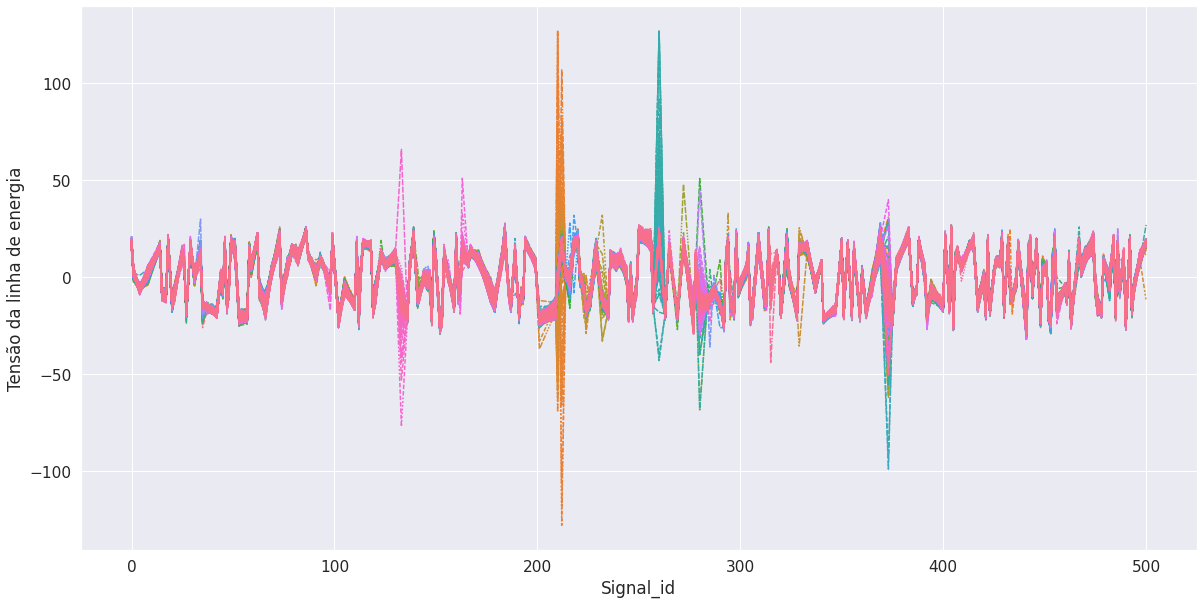

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.4)
sns.lineplot(data=dataset, legend=False)
plt.ylabel("Tensão da linha de energia")
plt.xlabel("Série")
plt.show()

Group into dates? to transform into a time series? What is the frequency of voltage measurement?

In [ ]:
describe = dataset.apply(pd.Series.describe, axis=1)
describe.head(10)

,count,mean,std,min,25%,50%,75%,max
292,3334.0,-23.024295,1.699529,-28.0,-24.0,-23.0,-22.0,-18.0
408,3334.0,-19.770546,0.837801,-26.0,-20.0,-20.0,-19.0,-17.0
231,3334.0,19.258248,2.642441,-92.0,19.0,19.0,20.0,65.0
154,3334.0,10.762448,1.551192,-1.0,10.0,11.0,12.0,17.0
311,3334.0,-16.447810,1.441365,-21.0,-17.0,-16.0,-15.0,-12.0
113,3334.0,3.026395,1.493629,-2.0,2.0,3.0,4.0,7.0
199,3334.0,7.465807,1.015866,4.0,7.0,7.0,8.0,11.0
197,3334.0,-11.262148,1.156373,-16.0,-12.0,-11.0,-11.0,-7.0
318,3334.0,11.905519,0.963672,9.0,11.0,12.0,13.0,15.0
476,3334.0,-14.047091,1.778932,-20.0,-15.0,-14.0,-13.0,-8.0


#####Figure 2 - Attempt to plot the data variance

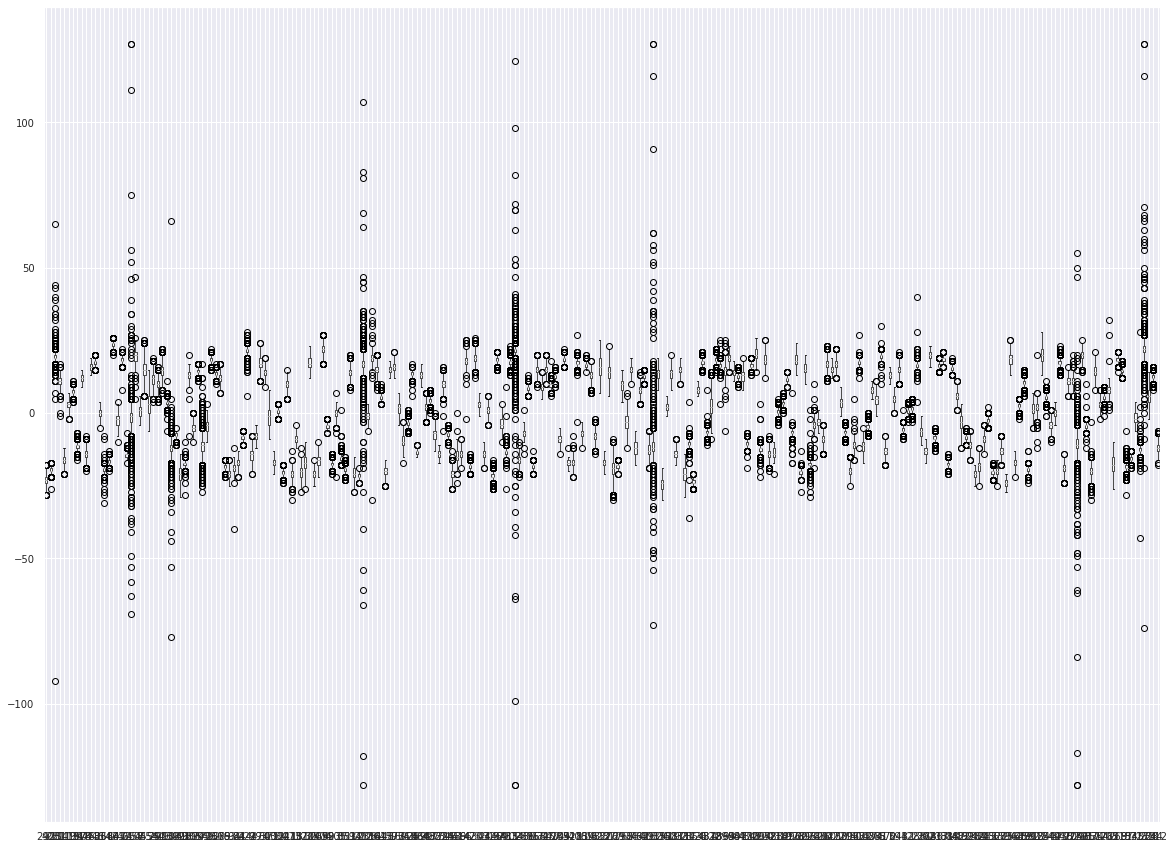

In [ ]:
dataset.T.boxplot(fontsize= '10', return_type='axes', figsize=(20,15))
plt.show()

In [ ]:
dataset = df1.sample(frac=.1)
dataset.head()

,0,3,6,9,12,15,18,21,24,27,30,33,36,39,42,45,48,51,54,57,60,63,66,69,72,75,78,81,84,87,90,93,96,99,102,105,108,111,114,117,...,9882,9885,9888,9891,9894,9897,9900,9903,9906,9909,9912,9915,9918,9921,9924,9927,9930,9933,9936,9939,9942,9945,9948,9951,9954,9957,9960,9963,9966,9969,9972,9975,9978,9981,9984,9987,9990,9993,9996,9999
148,-17,-17,-18,-17,-18,-18,-21,-20,-22,-21,-21,-21,-18,-19,-17,-17,-16,-18,-18,-19,-20,-21,-22,-20,-22,-20,-21,-19,-19,-19,-19,-19,-18,-20,-18,-19,-19,-20,-19,-20,...,-18,-21,-20,-22,-21,-22,-23,-21,-23,-20,-22,-19,-20,-19,-20,-20,-19,-23,-20,-22,-19,-22,-19,-20,-20,-20,-22,-20,-24,-20,-22,-20,-21,-20,-19,-21,-20,-22,-20,-22
299,-6,-7,-6,-7,-8,-8,-7,-8,-9,-7,-6,-7,-8,-6,-5,-7,-8,-6,-5,-8,-8,-6,-6,-9,-9,-8,-8,-10,-9,-7,-9,-9,-8,-7,-8,-8,-7,-7,-8,-9,...,-6,-6,-6,-8,-6,-6,-7,-7,-6,-6,-7,-7,-5,-6,-8,-6,-6,-7,-8,-6,-6,-8,-8,-6,-6,-8,-7,-5,-6,-7,-7,-5,-6,-8,-8,-8,-7,-6,-5,-7
422,17,17,16,15,14,16,17,18,17,16,15,14,16,16,17,18,15,14,15,16,16,18,17,15,15,15,16,17,19,18,16,16,16,16,18,19,18,18,17,16,...,19,18,16,18,19,18,18,18,16,17,17,17,19,19,18,17,17,17,18,19,19,18,18,17,18,20,20,19,18,18,17,18,20,19,19,18,16,16,18,20
26,4,4,5,3,4,4,4,5,4,5,4,5,5,5,5,5,5,3,5,4,5,4,4,4,3,5,4,5,4,5,4,5,5,4,5,4,5,4,5,4,...,8,5,6,7,6,6,6,7,5,6,6,6,5,6,5,5,6,5,6,5,7,6,7,6,7,6,6,7,6,7,6,7,6,6,6,5,6,6,7,5
13,-17,-17,-16,-17,-16,-17,-16,-17,-17,-17,-17,-17,-17,-16,-17,-16,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-17,-18,-17,-17,-17,-17,-16,-16,-17,-17,-18,-18,-17,-17,...,-19,-20,-18,-20,-19,-19,-18,-18,-19,-18,-19,-18,-19,-18,-19,-18,-19,-19,-18,-19,-18,-19,-19,-19,-19,-19,-18,-18,-18,-18,-18,-18,-19,-18,-19,-18,-18,-18,-18,-18


####Figure 3 - Line Voltage Variation Plot

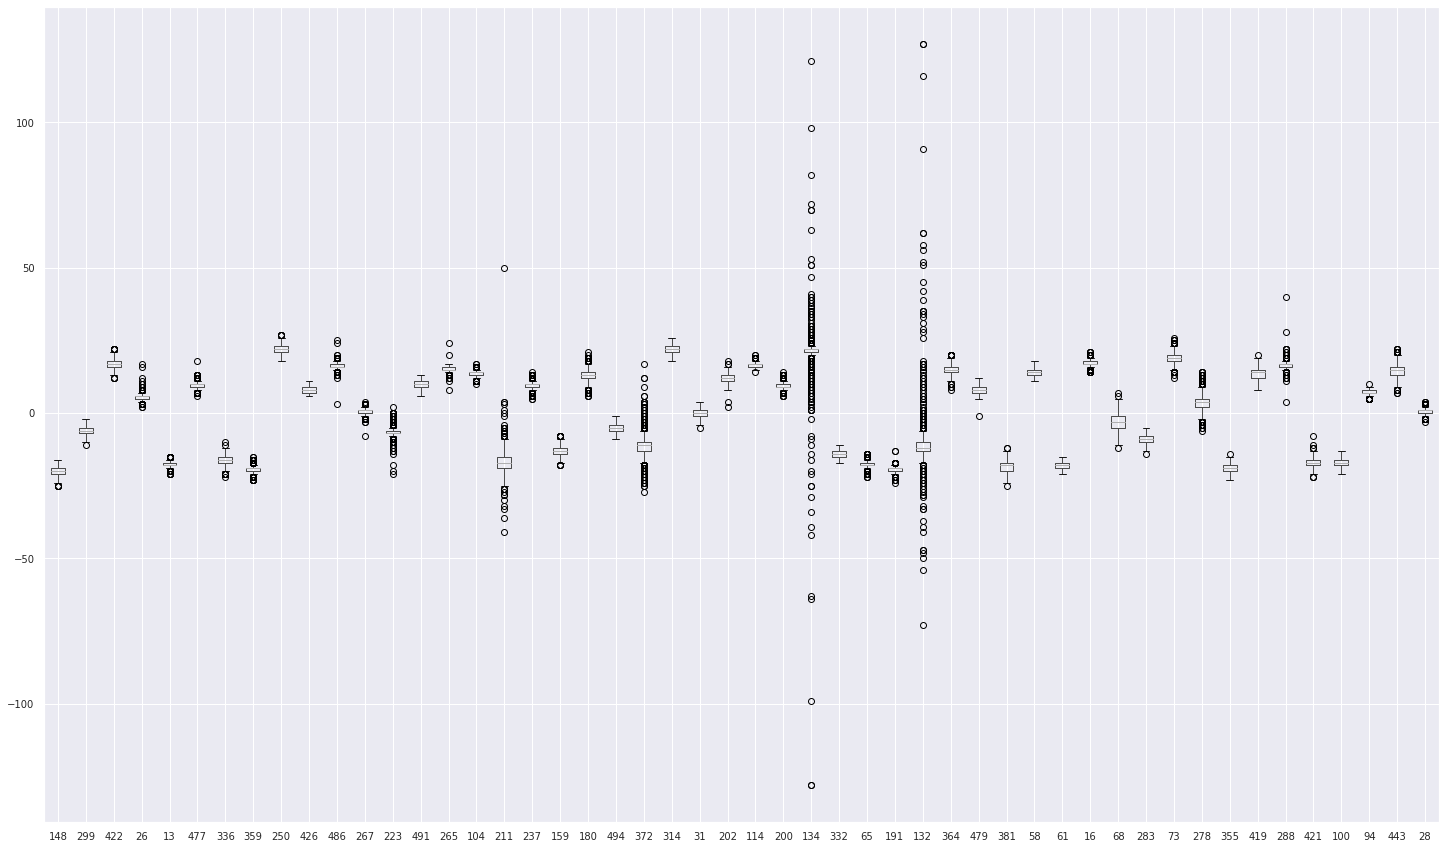

In [ ]:
dataset.T.boxplot(fontsize= '10', return_type='axes', figsize=(25,15))
plt.show()

In [ ]:
dataset = dataset.T
dataset.head()

,484,360,468,103,371,269,62,232,45,92,243,251,111,297,346,404,315,419,487,65,16,266,145,206,410,194,408,248,374,294,376,285,395,52,228,134,314,44,476,141,327,279,399,272,96,11,485,354,383,352
0,19,2,5,6,-1,-20,18,-16,-8,-18,17,-19,11,-15,-7,25,-6,11,-7,-19,17,-20,-1,17,12,19,-20,15,22,19,11,-11,17,4,4,22,19,0,-13,-13,2,-11,-7,17,19,23,-20,3,24,1
3,18,3,3,5,-3,-21,19,-14,-9,-17,17,-19,11,-14,-8,23,-7,8,-8,-19,18,-20,1,16,13,17,-19,17,20,18,12,-11,16,4,3,21,23,-1,-12,-12,2,-13,-7,15,19,22,-20,5,20,1
6,19,2,3,5,-2,-21,20,-14,-8,-18,18,-18,10,-14,-7,24,-6,13,-9,-18,18,-21,-1,15,14,17,-19,17,20,20,12,-10,14,4,2,22,21,0,-15,-12,1,-11,-8,15,18,26,-19,5,23,2
9,19,3,6,6,-1,-20,19,-16,-7,-18,18,-19,11,-16,-8,23,-6,15,-9,-18,16,-20,-3,15,13,17,-19,13,21,20,15,-11,15,4,4,21,23,-1,-16,-13,-1,-11,-7,17,19,23,-20,5,21,2
12,19,3,6,5,2,-21,19,-15,-9,-18,17,-20,13,-16,-6,24,-7,15,-8,-17,15,-21,-2,16,14,18,-19,15,19,20,14,-10,18,4,5,23,22,0,-13,-12,1,-10,-8,18,19,26,-19,4,22,4


####Figure 4 - Time series of the selected lines

In [ ]:
Y1 = dataset[484].values
Y2 = dataset[269].values
Y3 = dataset[232].values
Y4 = dataset[134].values
Y5 = dataset[360].values
Y6 = dataset[346].values
Y7 = dataset[419].values
Y8 = dataset[145].values
Y9 = dataset[44].values
Y10 = dataset[11].values
X = dataset.index
data_plot = pd.DataFrame({"Série":X, "Rede_484": Y1, "Rede_269": Y2, "Rede_232": Y3, "Rede_134": Y4, "Rede_360": Y5,
                          "Rede_346": Y6, "Rede_429": Y7, "Rede_145": Y8, "Rede_44": Y9, "Rede_11": Y10})
#data_plot.head()

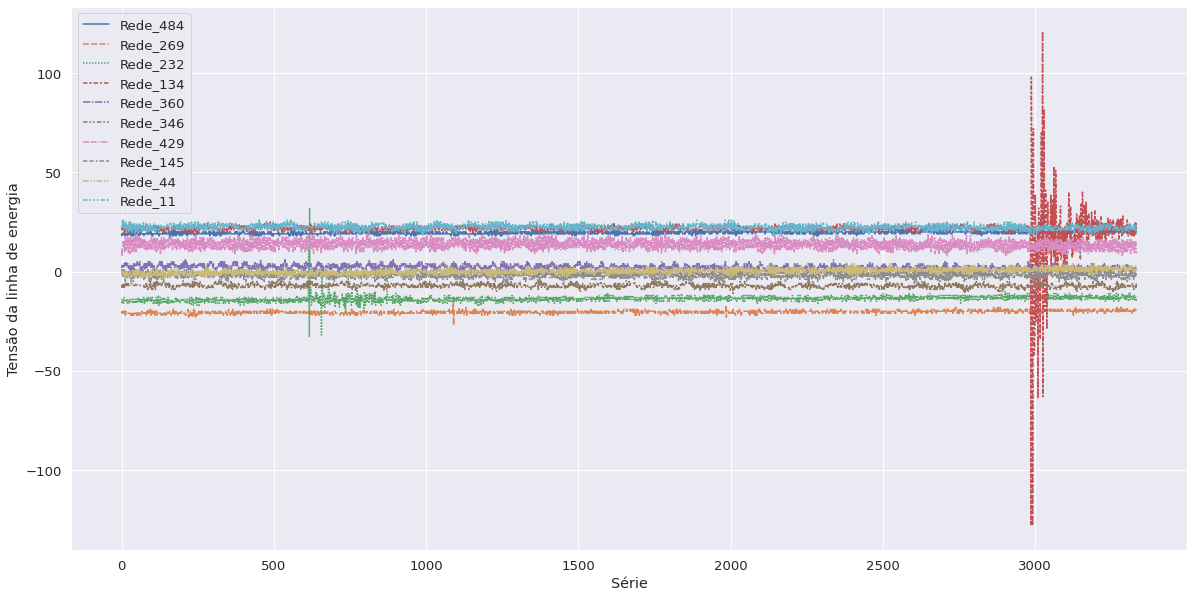

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1.2)
sns.lineplot(data=data_plot, legend=True)
plt.ylabel("Tensão da linha de energia")
plt.xlabel("Série")
plt.show()

####Figure 5 - Variance of the measurements in the selected lines

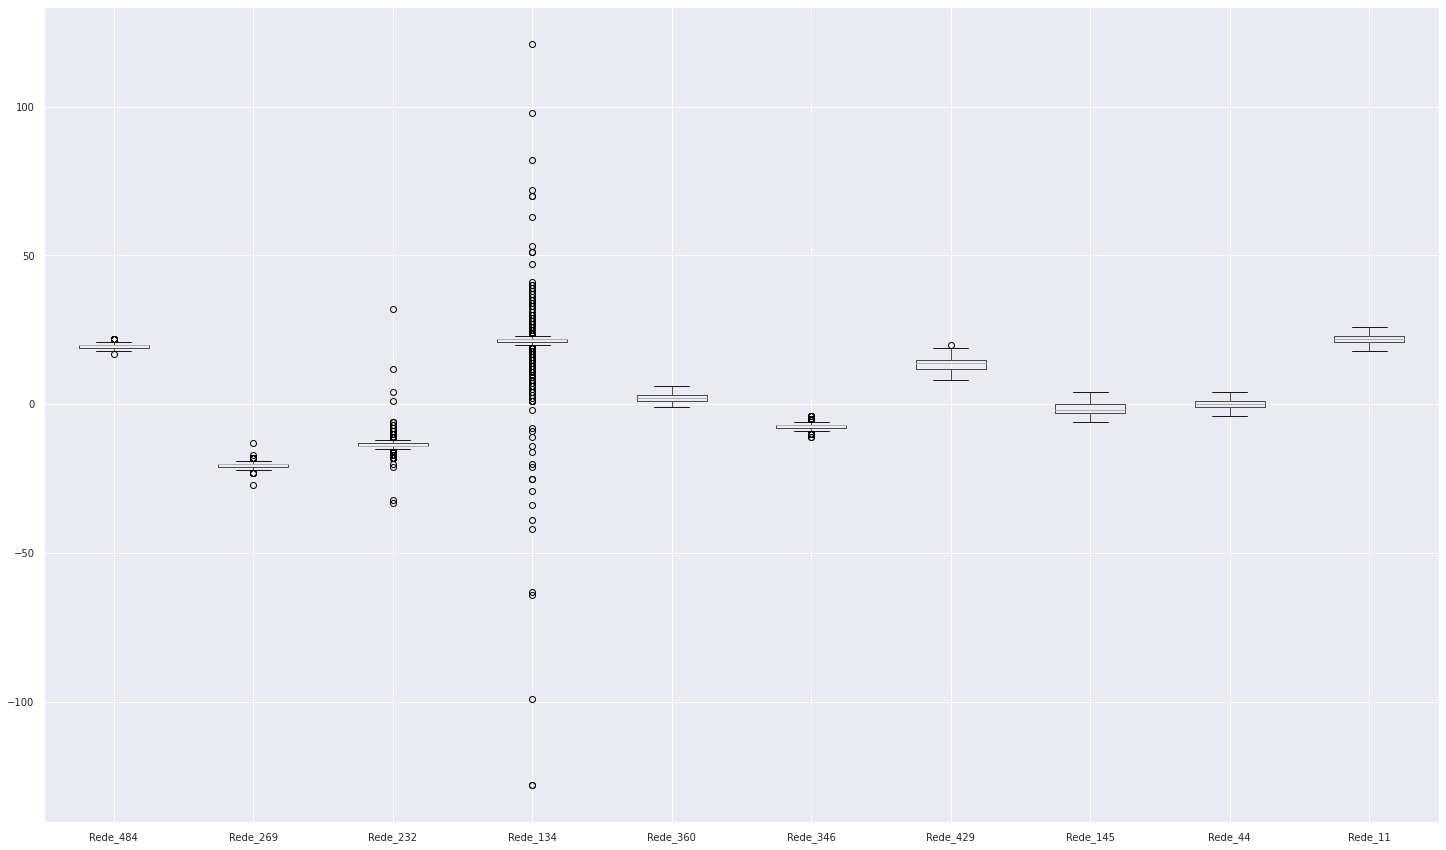

In [ ]:
data_plot.boxplot(fontsize= '10', return_type='axes', figsize=(25,15))
plt.show()

In [ ]:
df2.head()

,signal_id,phase,target
0,0,0,0
1,1,1,0
2,2,2,0
3,3,0,1
4,4,1,1


In [ ]:
df2['target'].value_counts()

0    466
1     35
Name: target, dtype: int64

In [ ]:
df2['phase'].value_counts()

2    167
1    167
0    167
Name: phase, dtype: int64

####Figure 6 - Relationship between target and phase

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 85.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


<Figure size 1440x720 with 0 Axes>

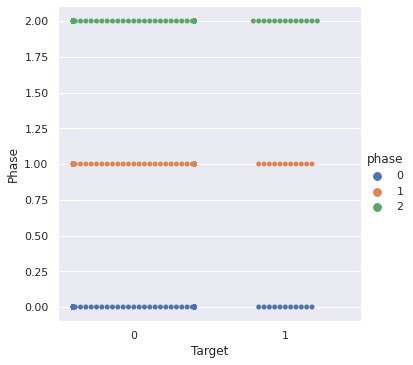

In [ ]:
plt.figure(figsize=(20, 10))
sns.set(font_scale=1)
sns.catplot(x="target", y="phase", hue="phase", kind="swarm", data=df2)
plt.ylabel("Phase")
plt.xlabel("Target")
plt.show()

## Considerations and future work
While performing the data analysis, ideas emerge that may represent potential for future work on the problem presented. Some of them are presented below:


1.   **Data transposition**: The data representing the measurements (series) are structured in columns, which can be transposed to rows. However, this solution needs to be further analyzed and tested, because while it may facilitate the use of a database table (e.g. dataframes), it may add noise. Noise in the database arises as a result of measurements being repeated on the same voltage line. 
2.   **Data Grouping**: Since the columns represent the voltage measurements, perhaps columns can be grouped according to a criterion. The caveat to this technique is the seasonality of the measurements. It would be important to know the frequency of the voltage measurements.
3.  **Supplementary information**: Information about the geographical location of measurements or lines can help in identifying faults due to adverse factors, for example natural storms and environmental disasters.

